In [ ]:
import networkx as nx
import pandas as pd
from itertools import chain
import matplotlib.pyplot as plt

In [ ]:
emails = pd.read_csv(r"/content/sample_data/emails.csv", header = None, sep = " ")

In [ ]:
emails_net = nx.from_pandas_edgelist(emails, source=0, target=1)

In [ ]:
emails_net

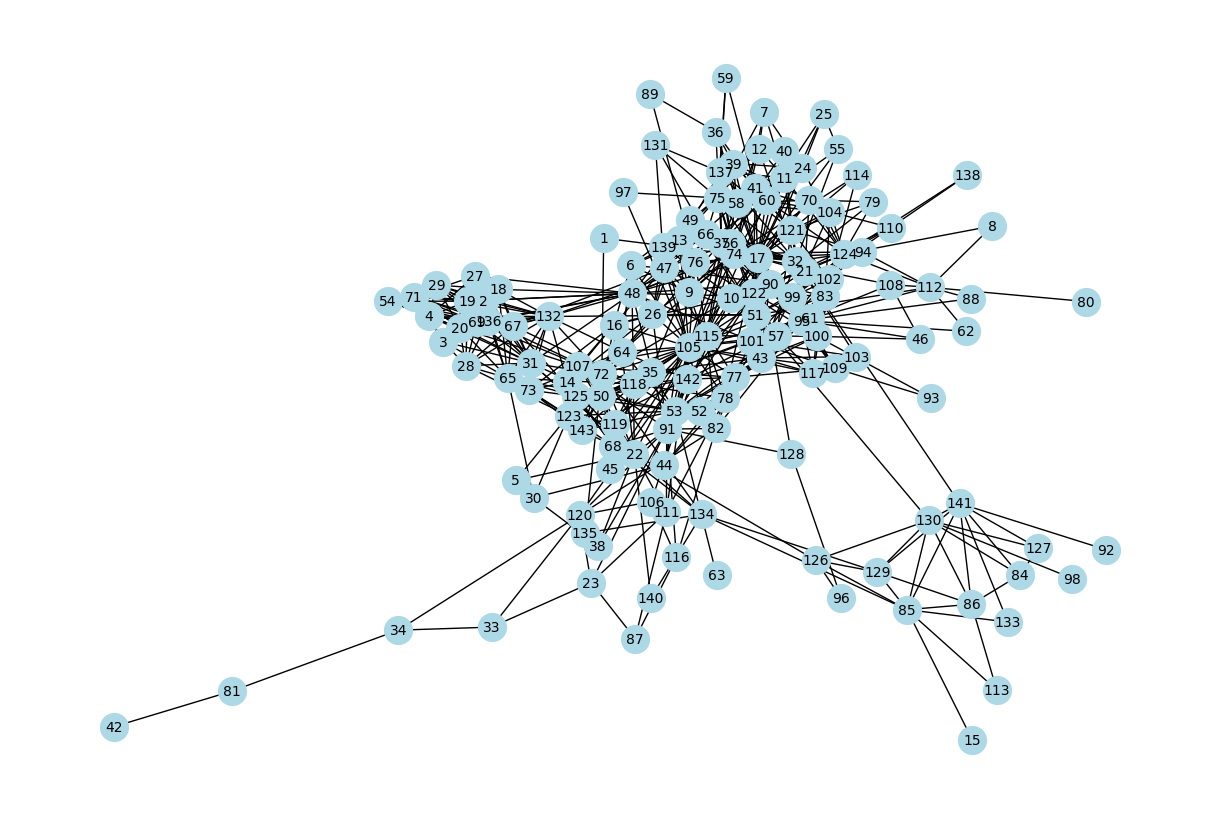

In [ ]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(emails_net, seed=42)

nx.draw(emails_net, pos, with_labels=True, node_size=400, node_color='lightblue', font_size=10, edge_color='black')

plt.show()

In [ ]:
print('El grado maximo es;', max(emails_net.degree(), key=lambda x: x[1]))
print('El grado minimo es;', min(emails_net.degree(), key=lambda x: x[1]))
print('El diametro es;', nx.diameter(emails_net))
print('Distancia promedio mas corta es;', nx.average_shortest_path_length(emails_net))

El grado maximo es; (105, 42)
El grado minimo es; (15, 1)
El diametro es; 8
Distancia promedio mas corta es; 2.967004826159756


Numero minimo de nodos para desconectar la red 1  el nodo a desconectar es  {85}
Numero minimo de arcos para desconectar la red 1  el arco a desconectar es  {(130, 98)}


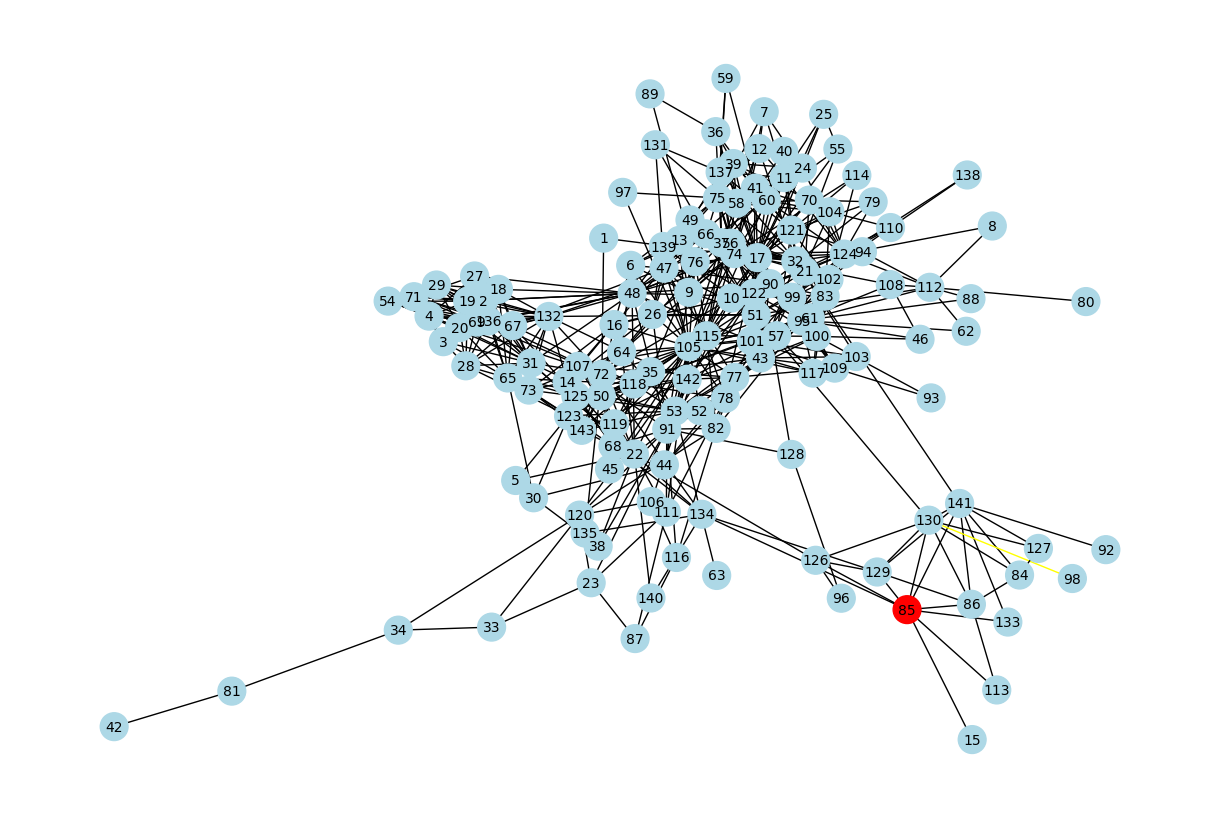

In [ ]:
print('Numero minimo de nodos para desconectar la red',  nx.node_connectivity(emails_net), ' el nodo a desconectar es ', nx.minimum_node_cut(emails_net))
print('Numero minimo de arcos para desconectar la red',  nx.edge_connectivity(emails_net), ' el arco a desconectar es ', nx.minimum_edge_cut(emails_net))

color_nodo = []
color_edge = []

for node in emails_net.nodes():
  if node ==  85:
    color_nodo.append('red')
  else:
    color_nodo.append('lightblue')

for edge in emails_net.edges():
    if edge == (130, 98):
      color_edge.append('yellow')
    else:
      color_edge.append('black')


plt.figure(figsize=(12, 8))
pos = nx.spring_layout(emails_net, seed=42)

nx.draw(emails_net, pos, with_labels=True, node_size=400, node_color=color_nodo, font_size=10, edge_color=color_edge)

plt.show()

In [ ]:
print('Centralidad de grado es;', nx.degree_centrality(emails_net))
print('Centralidad de intermediacion es;', nx.betweenness_centrality(emails_net))
print('Centralidad de cercania es;', nx.closeness_centrality(emails_net))

Centralidad de grado es; {17: 0.2112676056338028, 1: 0.014084507042253521, 72: 0.11971830985915494, 3: 0.08450704225352113, 2: 0.09154929577464789, 19: 0.11267605633802817, 20: 0.11971830985915494, 27: 0.07042253521126761, 29: 0.07746478873239437, 31: 0.1267605633802817, 48: 0.14084507042253522, 65: 0.1056338028169014, 67: 0.11267605633802817, 69: 0.11267605633802817, 71: 0.07746478873239437, 132: 0.13380281690140847, 136: 0.11971830985915494, 4: 0.07746478873239437, 28: 0.07042253521126761, 54: 0.04929577464788733, 22: 0.09859154929577466, 5: 0.014084507042253521, 9: 0.08450704225352113, 6: 0.06338028169014084, 13: 0.07746478873239437, 16: 0.07042253521126761, 26: 0.07746478873239437, 47: 0.11267605633802817, 49: 0.07042253521126761, 64: 0.09154929577464789, 66: 0.07746478873239437, 105: 0.29577464788732394, 11: 0.056338028169014086, 7: 0.035211267605633804, 12: 0.04225352112676056, 24: 0.056338028169014086, 74: 0.1267605633802817, 75: 0.1056338028169014, 112: 0.06338028169014084, 8: 

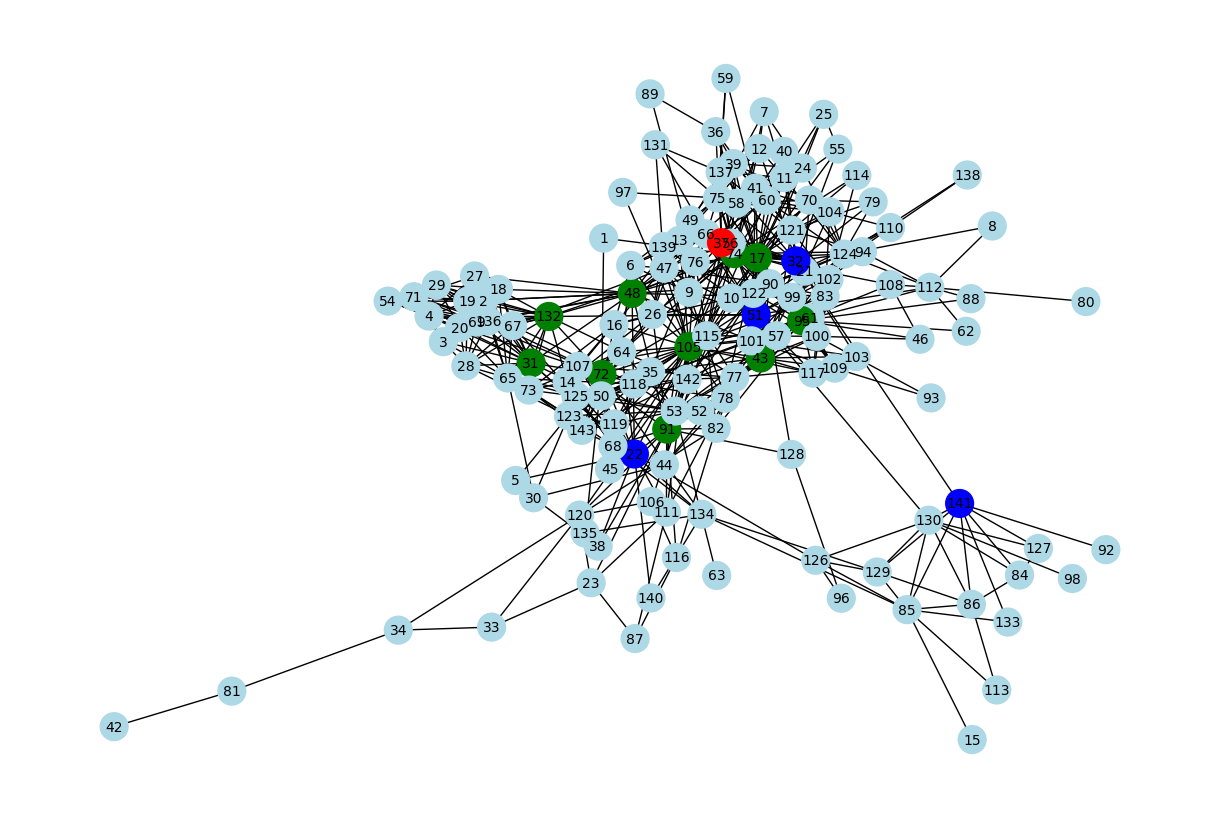

In [ ]:
centralidad_grado = sorted(nx.degree_centrality(emails_net).items(), key = lambda x: x[1], reverse=True)[:10]
centralidad_bw = sorted(nx.betweenness_centrality(emails_net).items(), key = lambda x: x[1], reverse=True)[:10]
centralidad_close = sorted(nx.closeness_centrality(emails_net).items(), key = lambda x: x[1], reverse=True)[:10]

color = []

nodos_grado = [x for x in list(set(chain.from_iterable(centralidad_grado))) if int(x) != 0]
nodos_bw = [x for x in list(set(chain.from_iterable(centralidad_bw))) if int(x) != 0]
nodos_close = [x for x in list(set(chain.from_iterable(centralidad_close))) if int(x) != 0]

for nodo in emails_net.nodes():
    if nodo in nodos_grado:
      color.append('green')
    elif nodo in nodos_bw:
      color.append('blue')
    elif nodo in nodos_close:
      color.append('red')
    else:
      color.append('lightblue')

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(emails_net, seed=42)

nx.draw(emails_net, pos, with_labels=True, node_size=400, node_color=color, font_size=10, edge_color='black')

plt.show()

In [ ]:
emails_net_Di = nx.from_pandas_edgelist(emails, source=0, target=1, create_using=nx.DiGraph())

In [ ]:
print('PageRank es;', nx.pagerank(emails_net))

PageRank es; {17: 0.0223554451933045, 1: 0.0023120359296268543, 72: 0.012594189294840769, 3: 0.007166066940044207, 2: 0.007718019663306051, 19: 0.0093217332297498, 20: 0.009905681834800222, 27: 0.006172598307121674, 29: 0.006670424854552443, 31: 0.011010284406377911, 48: 0.013004183803537125, 65: 0.00939485918921802, 67: 0.00944825447290529, 69: 0.009433475589606694, 71: 0.006664162657014979, 132: 0.011447131707079913, 136: 0.009954436763820518, 4: 0.006687851008781628, 28: 0.0061990479880426165, 54: 0.004584281913800397, 22: 0.011368214740422775, 5: 0.002368839601522151, 9: 0.008603786856214875, 6: 0.006439305580689609, 13: 0.0077651835115895365, 16: 0.007021006166681283, 26: 0.0077991496093613175, 47: 0.010966700694993328, 49: 0.007231859250210231, 64: 0.008887127249477073, 66: 0.007996206006215017, 105: 0.028920022374199314, 11: 0.0063676262236329285, 7: 0.004391319850578999, 12: 0.004997632548408219, 24: 0.006588991951808287, 74: 0.012999439286627697, 75: 0.011362198951318443, 112:

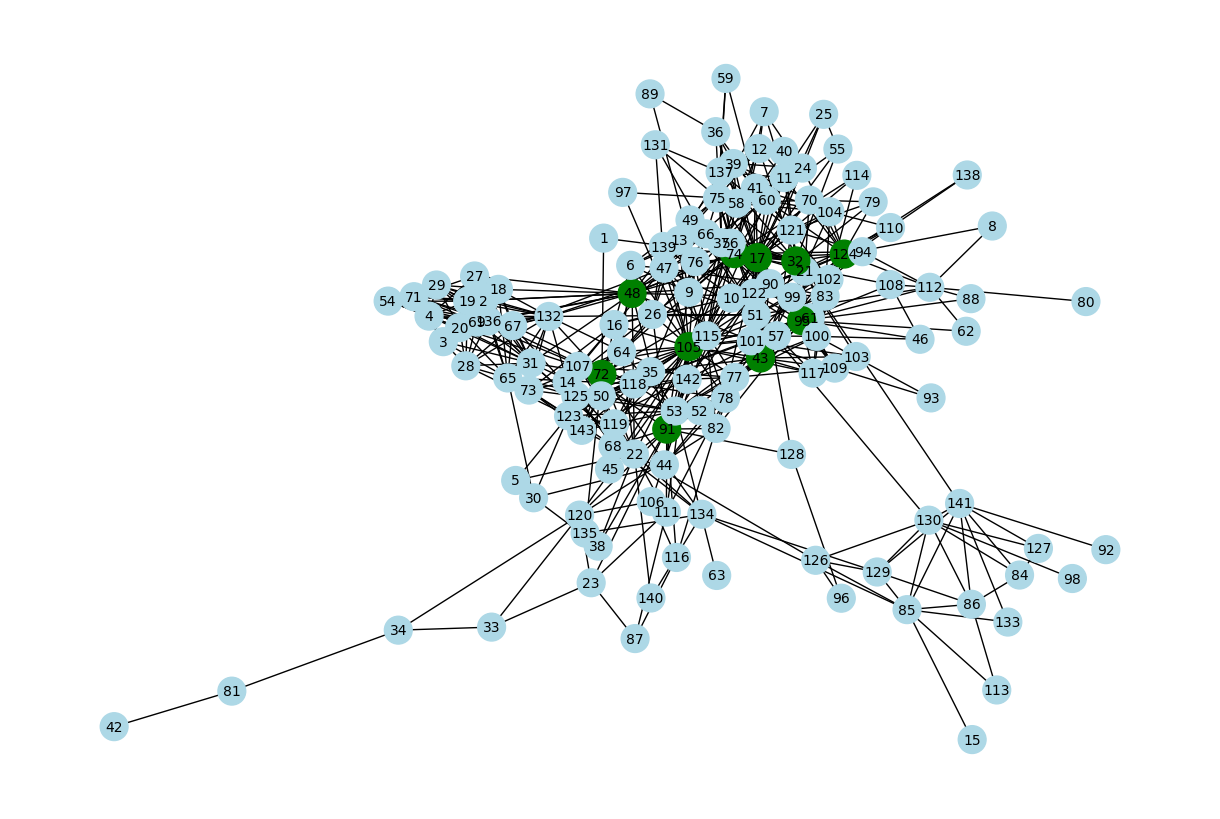

In [ ]:
page_rank = sorted(nx.pagerank(emails_net).items(), key = lambda x: x[1], reverse=True)[:10]

color = []

nodos_page_rank = [x for x in list(set(chain.from_iterable(page_rank))) if int(x) != 0]

for nodo in emails_net.nodes():
    if nodo in nodos_page_rank:
      color.append('green')
    else:
      color.append('lightblue')

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(emails_net, seed=42)

nx.draw(emails_net, pos, with_labels=True, node_size=400, node_color=color, font_size=10, edge_color='black')

plt.show()

In [ ]:
emails_net.number_of_nodes()

143

In [ ]:
emails_net.number_of_edges()

623